# 資料科學家養成全書 ch1-ch7 資料處理、科學計算、敘述統計

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Scipy

In [2]:
sp.__version__

'1.5.2'

* 行列式: det()
* 反矩陣: inv()
* 原始矩陣與反矩陣乘積 = 單位矩陣
* 特徵值與特徵向量: eig()

In [3]:
import scipy.linalg as linalg

In [4]:
matrix = np.array([[1,-1,-1],[-1,1,-1],[-1,-1,1]])
print(linalg.det(matrix))

-4.0


In [5]:
print(linalg.inv(matrix))

[[ 0.  -0.5 -0.5]
 [-0.5 -0.  -0.5]
 [-0.5 -0.5  0. ]]


In [6]:
print(matrix.dot(linalg.inv(matrix)))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [7]:
eig_value, eig_vector = linalg.eig(matrix)

In [8]:
eig_value

array([-1.+0.j,  2.+0.j,  2.+0.j])

In [9]:
eig_vector

array([[ 0.57735027, -0.81649658,  0.42755853],
       [ 0.57735027,  0.40824829, -0.81618716],
       [ 0.57735027,  0.40824829,  0.38862863]])

* 方程式求解: 牛頓法 newton()
* 求得最小值: minimize_scalar()

In [10]:
def my_function(x):
    return (x**2 + 2*x +1)

In [11]:
from scipy.optimize import newton
print(newton(my_function,0))

-0.9999999852953906


In [12]:
from scipy.optimize import minimize_scalar
print(minimize_scalar(my_function, method = 'Brent'))

     fun: 0.0
    nfev: 9
     nit: 4
 success: True
       x: -1.0000000000000002


### matplotlib

In [13]:
np.random.seed(0)
x = np.random.randn(30)
y = np.sin(x) + np.random.randn(30)

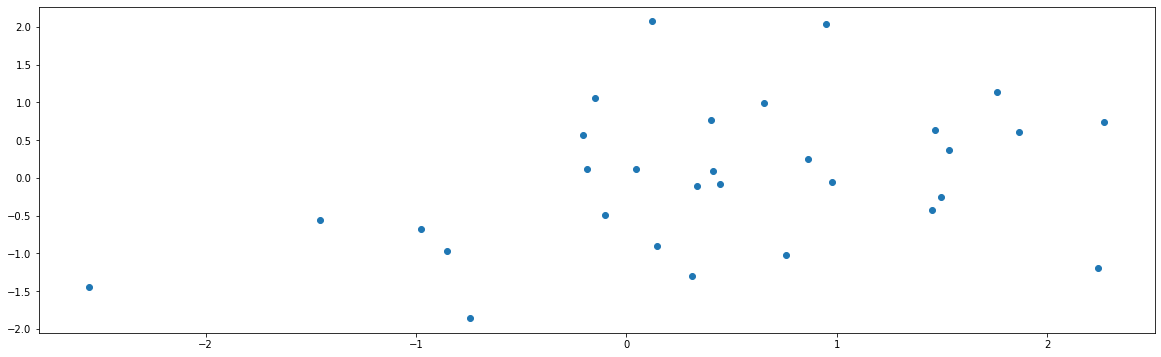

In [14]:
plt.figure(figsize=(20,6))
plt.plot(x,y,'o')

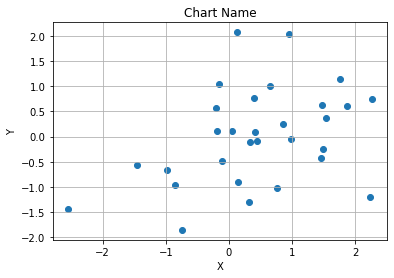

In [15]:
plt.scatter(x,y)
plt.title('Chart Name')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)

Text(0, 0.5, 'Y')

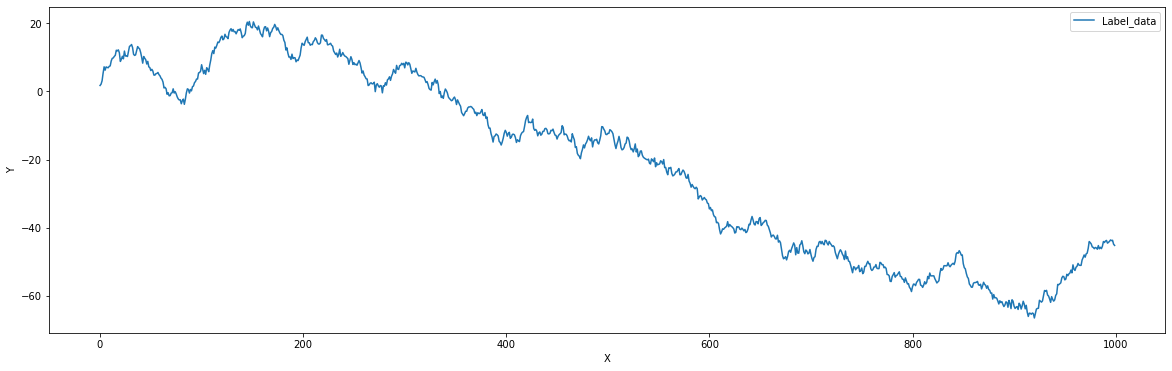

In [16]:
np.random.seed(0)
data_x = np.arange(1000)
data_y = np.random.randn(1000).cumsum()

plt.figure(figsize=(20,6))
plt.plot(data_x, data_y, label='Label_data')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

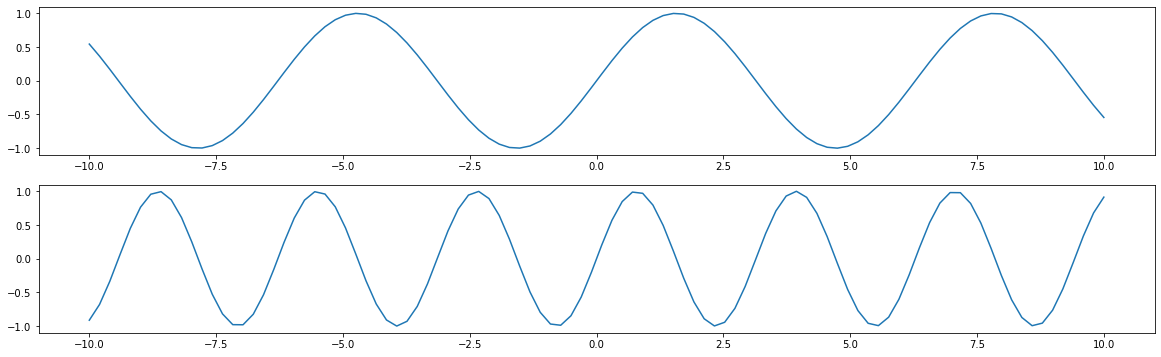

In [17]:
x=np.linspace(-10,10,100)
y=np.linspace(-10,10,100)

plt.figure(figsize=(20,6))
plt.subplot(2,1,1)  #2列1行圖形的第一個
plt.plot(x, np.sin(x))
plt.subplot(2,1,2)  #2列1行圖形的第2個
plt.plot(y, np.sin(2*y))

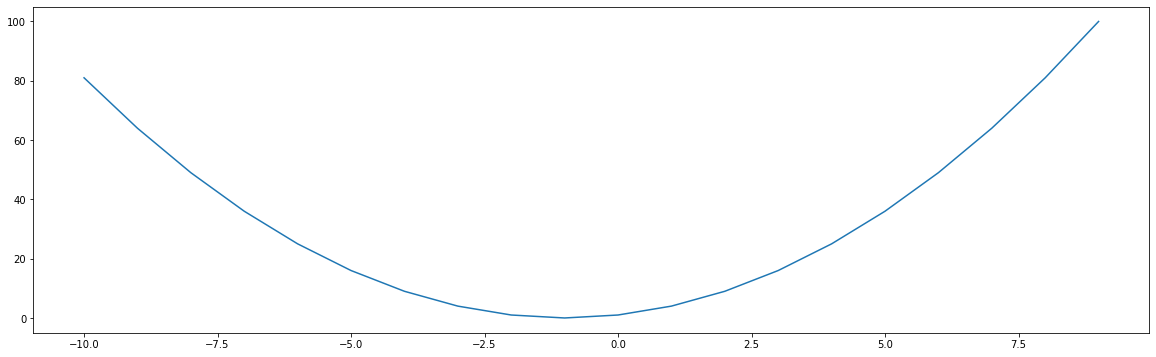

In [18]:
def my_function(x):
    return x**2+2*x+1

x=np.arange(-10,10)
plt.figure(figsize=(20,6))
plt.plot(x, my_function(x))

#### 長條圖

Text(0, 0.5, 'Score')

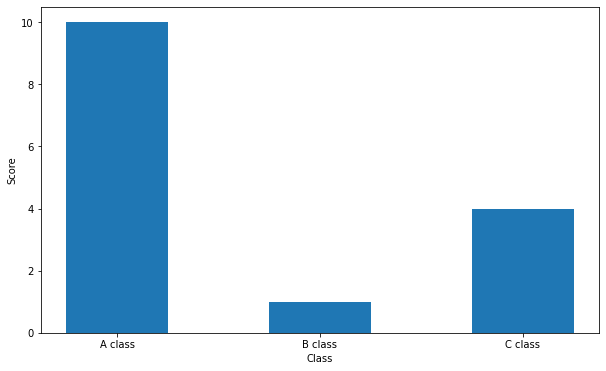

In [19]:
x = [1,2,3]
y = [10,1,4]

plt.figure(figsize=(10,6))
plt.bar(x, y, align='center', width=0.5)
plt.xticks(x, ['A class','B class','C class'])
plt.xlabel('Class')
plt.ylabel('Score')

Text(0.5, 0, 'Score')

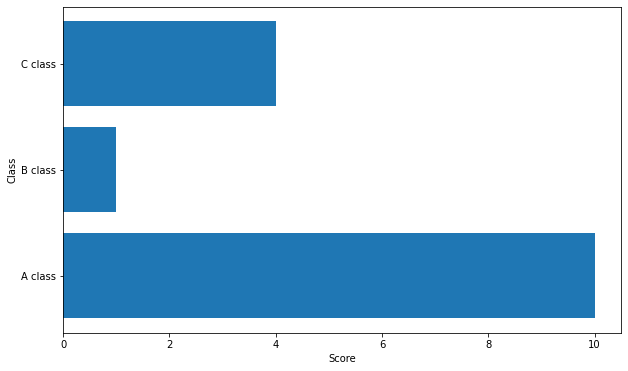

In [20]:
plt.figure(figsize=(10,6))
plt.barh(x, y, align='center')
plt.yticks(x, ['A class','B class','C class'])
plt.ylabel('Class')
plt.xlabel('Score')

([<matplotlib.axis.XTick at 0x23cda368610>,
 [Text(0.2, 0, 'A class'), Text(1.2, 0, 'B class'), Text(2.2, 0, 'C class')])

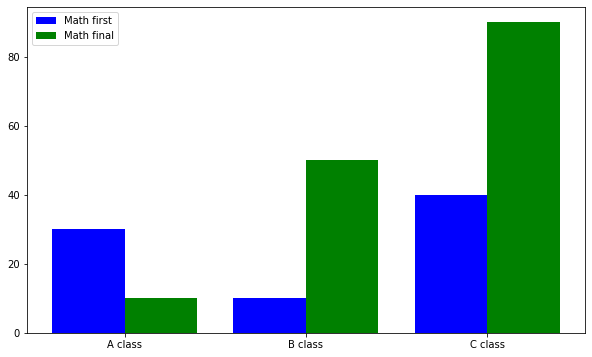

In [21]:
y1 = np.array([30,10,40])
y2 = np.array([10,50,90])
x = np.arange(len(y1))
w = 0.4

plt.figure(figsize=(10,6))
plt.bar(x, y1, color='blue', width=w, label='Math first', align='center')
plt.bar(x+w, y2, color='green', width=w, label='Math final', align='center')
plt.legend(loc='best')
plt.xticks(x+w/2, ['A class','B class','C class'])

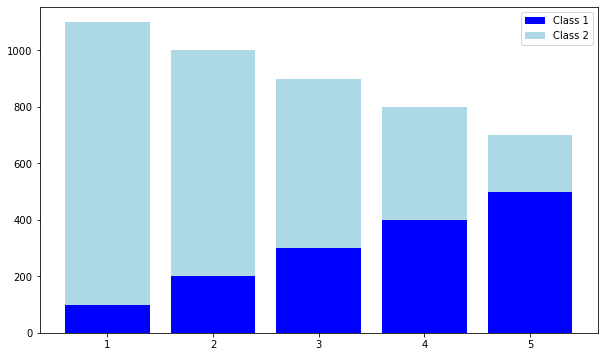

In [22]:
height1 = np.array([100,200,300,400,500])
height2 = np.array([1000,800,600,400,200])
x = np.array([1,2,3,4,5])

plt.figure(figsize=(10,6))
p1 = plt.bar(x, height1, color='blue')
p2 = plt.bar(x, height2, bottom=height1, color='lightblue')
plt.legend((p1[0],p2[0]),('Class 1','Class 2'))

#### 圓餅圖

(-1.2142507666786346,
 1.134711077927507,
 -1.1258468317413044,
 1.101230806657754)

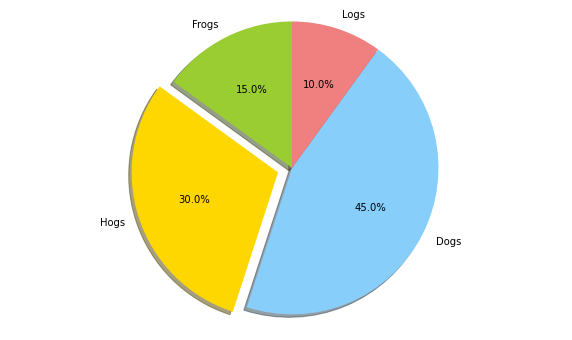

In [23]:
plt.figure(figsize=(10,6))
plt.pie([15,30,45,10], 
        explode=(0,0.1,0,0), 
        labels=['Frogs','Hogs','Dogs','Logs'], 
        colors=['yellowgreen','gold','lightskyblue','lightcoral'], 
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

#### 泡泡圖

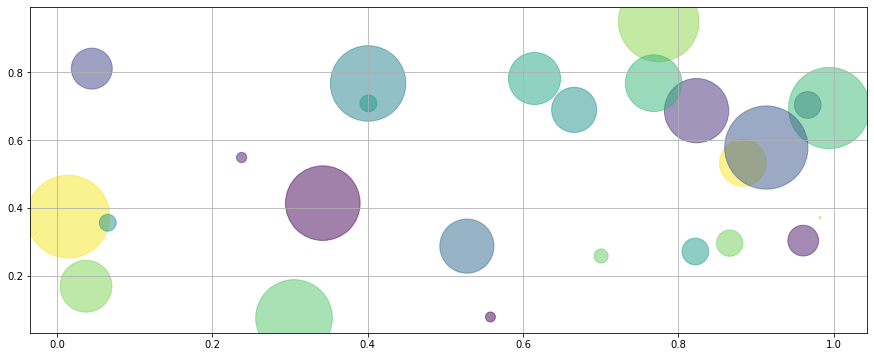

In [24]:
N = 25
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = 10 * np.pi * (15 * np.random.rand(N)) ** 2

plt.figure(figsize=(15,6))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.grid(True)

### 讀取資料

In [25]:
import requests, zipfile
from io import StringIO
import io

In [26]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
r = requests.get(url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [27]:
student_data = pd.read_csv('student-mat.csv', sep=';')
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [28]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## 敘述統計

In [29]:
student_data.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

Text(0, 0.5, 'count')

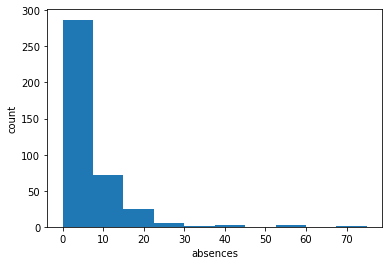

In [30]:
plt.hist(student_data['absences'])
plt.xlabel('absences')
plt.ylabel('count')

In [31]:
print('平均值: ', student_data['absences'].mean())
print('中位數: ', student_data['absences'].median())
print('眾數: ', student_data['absences'].mode())
print('變異數: ', student_data['absences'].var())
print('標準差: ', student_data['absences'].std())

平均值:  5.708860759493671
中位數:  4.0
眾數:  0    0
dtype: int64
變異數:  64.04954057700951
標準差:  8.003095687108177


In [32]:
student_data['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [33]:
print('四分位距: ', student_data['absences'].describe()[6] - student_data['absences'].describe()[4])

四分位距:  8.0


In [34]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [35]:
print('變異係數(CV): ', student_data['absences'].std()/student_data['absences'].mean())

變異係數(CV):  1.4018726369879067


In [36]:
student_data.std() / student_data.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x23cdbd35430>,
 'caps': [<matplotlib.lines.Line2D at 0x23cdbd35af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23cdbd350d0>,
 'medians': [<matplotlib.lines.Line2D at 0x23cdbd4f1f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x23cdbd4f580>,
 'means': []}

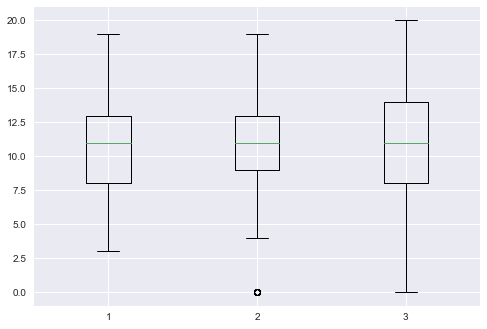

In [37]:
plt.style.use('seaborn')
plt.boxplot([student_data['G1'], student_data['G2'], student_data['G3']])

Text(0, 0.5, 'G3 grade')

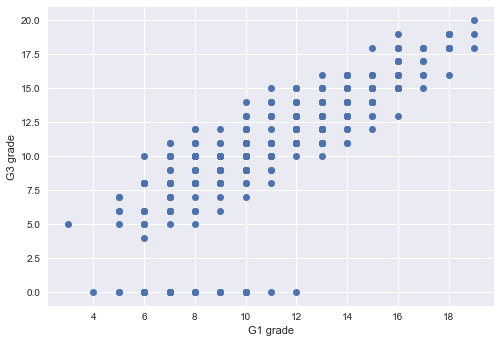

In [38]:
plt.plot(student_data['G1'],student_data['G3'],'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

In [39]:
np.cov(student_data['G1'],student_data['G3'])

array([[11.01705327, 12.18768232],
       [12.18768232, 20.9896164 ]])

In [40]:
print('相關係數與p值:', sp.stats.pearsonr(student_data['G1'],student_data['G3']))

相關係數與p值: (0.801467932017414, 9.001430312277865e-90)


In [41]:
np.corrcoef(student_data['G1'],student_data['G3'])

array([[1.        , 0.80146793],
       [0.80146793, 1.        ]])

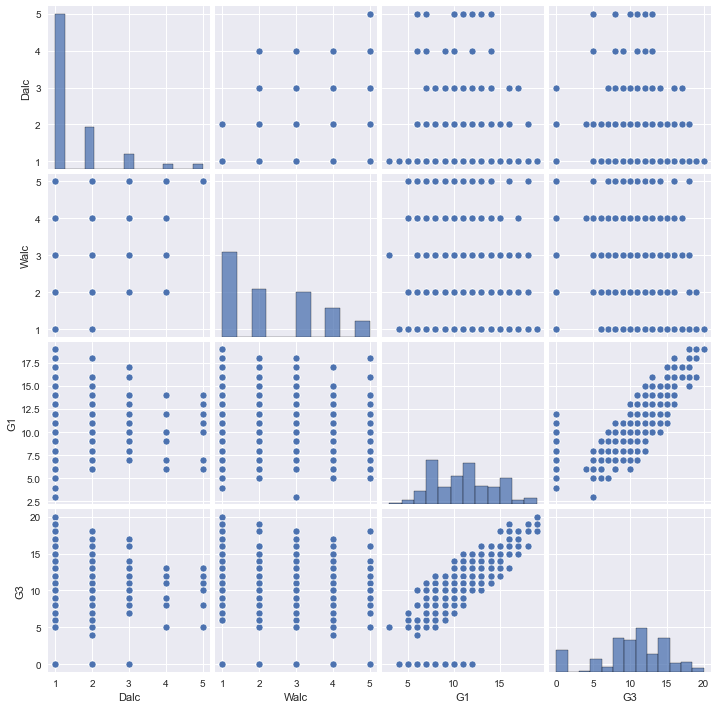

In [42]:
sns.pairplot(student_data[['Dalc','Walc','G1','G3']])
plt.grid(True)

In [43]:
student_data_por = pd.read_csv('student-por.csv', sep=';')
student_data_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [44]:
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [45]:
pd.merge(student_data,student_data_por,how='inner',
         on=['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'],
        suffixes=['_math','_por'])

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,...,3,4,4,2,2,5,3,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [46]:
del student_data_por

## 線性迴歸分析

In [47]:
from sklearn import linear_model

In [48]:
X = student_data.loc[:,['G1']].values
X

array([[ 5],
       [ 5],
       [ 7],
       [15],
       [ 6],
       [15],
       [12],
       [ 6],
       [16],
       [14],
       [10],
       [10],
       [14],
       [10],
       [14],
       [14],
       [13],
       [ 8],
       [ 6],
       [ 8],
       [13],
       [12],
       [15],
       [13],
       [10],
       [ 6],
       [12],
       [15],
       [11],
       [10],
       [ 9],
       [17],
       [17],
       [ 8],
       [12],
       [ 8],
       [15],
       [15],
       [12],
       [14],
       [ 7],
       [12],
       [19],
       [ 8],
       [10],
       [ 8],
       [11],
       [19],
       [15],
       [ 7],
       [12],
       [11],
       [11],
       [ 8],
       [10],
       [ 8],
       [14],
       [14],
       [ 9],
       [15],
       [10],
       [10],
       [ 8],
       [10],
       [10],
       [16],
       [13],
       [ 7],
       [ 8],
       [16],
       [13],
       [10],
       [ 8],
       [12],
       [11],
       [ 9],
       [11],

In [49]:
Y = student_data['G3'].values
Y

array([ 6,  6, 10, 15, 10, 15, 11,  6, 19, 15,  9, 12, 14, 11, 16, 14, 14,
       10,  5, 10, 15, 15, 16, 12,  8,  8, 11, 15, 11, 11, 12, 17, 16, 12,
       15,  6, 18, 15, 11, 13, 11, 12, 18, 11,  9,  6, 11, 20, 14,  7, 13,
       13, 10, 11, 13, 10, 15, 15,  9, 16, 11, 11,  9,  9, 10, 15, 12,  6,
        8, 16, 15, 10,  5, 14, 11, 10, 10, 11, 10,  5, 12, 11,  6, 15, 10,
        8,  6, 14, 10,  7,  8, 18,  6, 10, 14, 10, 15, 10, 14,  8,  5, 17,
       14,  6, 18, 11,  8, 18, 13, 16, 19, 10, 13, 19,  9, 16, 14, 13,  8,
       13, 15, 15, 13, 13,  8, 12, 11,  9,  0, 18,  0,  0, 12, 11,  0,  0,
        0,  0, 12, 15,  0,  9, 11, 13,  0, 11,  0, 11,  0, 10,  0, 14, 10,
        0, 12,  8, 13, 10, 15, 12,  0,  7,  0, 10,  7, 12, 10, 16,  0, 14,
        0, 16, 10,  0,  9,  9, 11,  6,  9, 11,  8, 12, 17,  8, 12, 11, 11,
       15,  9, 10, 13,  9,  8, 10, 14, 15, 16, 10, 18, 10, 16, 10, 10,  6,
       11,  9,  7, 13, 10,  7,  8, 13, 14,  8, 10, 15,  4,  8,  8, 10,  6,
        0, 17, 13, 14,  7

In [50]:
reg = linear_model.LinearRegression()
reg.fit(X,Y)
print('迴歸係數: ', reg.coef_)
print('截距: ', reg.intercept_)

迴歸係數:  [1.10625609]
截距:  -1.6528038288004616


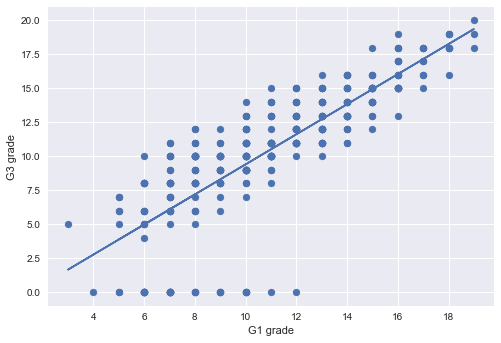

In [51]:
plt.scatter(X,Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.plot(X, reg.predict(X))

In [52]:
print('決定係數: ', reg.score(X,Y))

決定係數:  0.64235084605227


## 練習

1. 依男女別從小到大排序，讓橫軸為人數的累積比率，縱軸為第一學期的值之累積比率，這曲線稱之為「洛倫茲曲線(Lorenz curve)」。請將洛倫茲曲線依男女別把第一學期的數學成績描繪為圖形。

「洛倫茲曲線(Lorenz curve)」經常被用來描述收入的分配情況，即以x%代表一部分（收入相似）家庭占整個社會家庭的比例，以y%代表該部分家庭的收入占整個社會收入的比例。

In [53]:
student_data_M = student_data[student_data['sex'] == 'M']
student_data_F = student_data[student_data['sex'] == 'F']

In [54]:
sorted_data_M_G1 = student_data_M['G1'].sort_values()
sorted_data_F_G1 = student_data_F['G1'].sort_values()

In [55]:
len_M = np.arange(len(sorted_data_M_G1))
len_F = np.arange(len(sorted_data_F_G1))

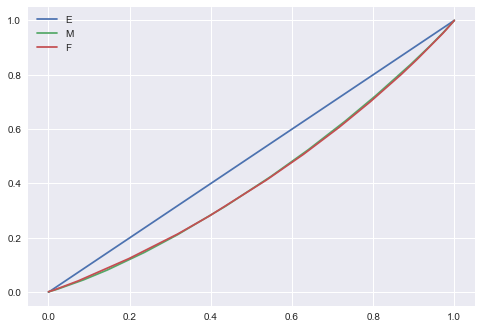

In [56]:
plt.plot(len_F/len_F.max(), len_F/len_F.max(), label='E')
plt.plot(len_M/len_M.max(), sorted_data_M_G1.cumsum()/sorted_data_M_G1.sum(), label='M')
plt.plot(len_F/len_F.max(), sorted_data_F_G1.cumsum()/sorted_data_F_G1.sum(), label='F')
plt.legend()
plt.grid(True)

2. 「基尼係數(Gini coefficient)」被定義為洛倫茲曲線與45度線圍住部分的面積之2倍，介於0到1之間的數值，當該值越大代表不平等的程度越大。請利用範例資料，分別求得男女別第一學習成績的基尼係數。

根據洛倫茲曲線所定義的判斷年所得分配公平程度的指標，是比例數值，在0和1之間。基尼指數（Gini index）是基尼係數乘100倍作百分比表示。

In [57]:
def heikinsa(data):
    subt = []
    for i in range(0, len(data)-1):
        for j in range(i+1, len(data)):
            subt.append(np.abs(data[i] - data[j]))
    return float(sum(subt))*2 / (len(data) ** 2)

def gini(heikinsa, data):
    return heikinsa / (2 * np.mean(data))

In [58]:
print('男性數學成績的基尼係數: ', gini(heikinsa(np.array(sorted_data_M_G1)), np.array(sorted_data_M_G1)))
print('女性數學成績的基尼係數: ', gini(heikinsa(np.array(sorted_data_F_G1)), np.array(sorted_data_F_G1)))

男性數學成績的基尼係數:  0.17197351667939903
女性數學成績的基尼係數:  0.1723782950865341


In [59]:
del sorted_data_M_G1, sorted_data_F_G1, student_data_M, student_data_F

## 統計機率

In [60]:
dice_data = np.array([1,2,3,4,5,6])
print('隨機取出1個: ', np.random.choice(dice_data,1))

隨機取出1個:  [5]


In [61]:
dice_rolls = np.random.choice(dice_data,1000)
for i in range(1,7):
    p = len(dice_rolls[dice_rolls == i]) / 1000
    print(i,'出現的機率',p)

1 出現的機率 0.15
2 出現的機率 0.161
3 出現的機率 0.168
4 出現的機率 0.187
5 出現的機率 0.167
6 出現的機率 0.167


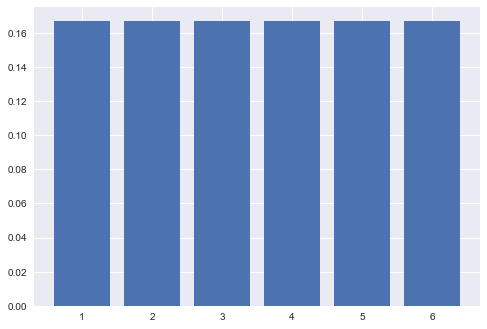

In [62]:
#均勻分佈(Uniform distribution)
prob_data = np.array([])
prob_data = np.append(prob_data, len(dice_rolls[dice_rolls == i]) / 1000)
plt.bar(dice_data, prob_data)
plt.grid(True)

(array([  2.,  21.,  77., 198., 149., 267., 177.,  89.,  16.,   4.]),
 array([ 6. ,  7.8,  9.6, 11.4, 13.2, 15. , 16.8, 18.6, 20.4, 22.2, 24. ]),
 <BarContainer object of 10 artists>)

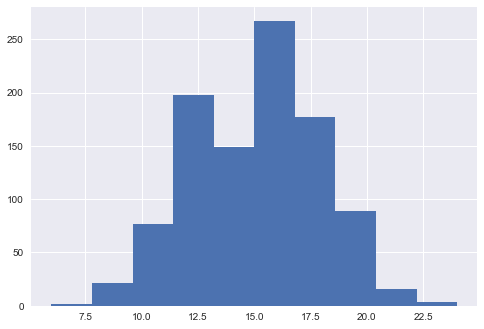

In [63]:
#二項式分布 (Binomial distribution)
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)

(array([  8.,  74.,  97., 276., 150., 241., 117.,  18.,  17.,   2.]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <BarContainer object of 10 artists>)

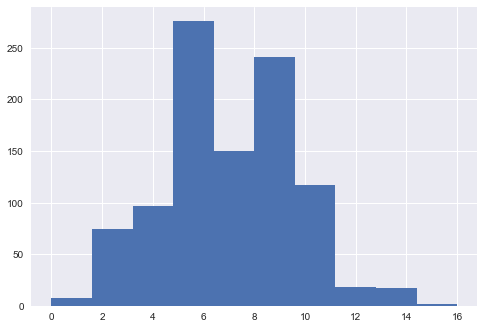

In [64]:
#卜瓦松分布/帕松分佈 (Poission distribtion)
x = np.random.poisson(7,1000)
plt.hist(x)

(array([  11.,  141.,  646., 1976., 3049., 2628., 1215.,  282.,   48.,
           4.]),
 array([-33.23940486, -25.19561879, -17.15183273,  -9.10804666,
         -1.06426059,   6.97952547,  15.02331154,  23.06709761,
         31.11088367,  39.15466974,  47.19845581]),
 <BarContainer object of 10 artists>)

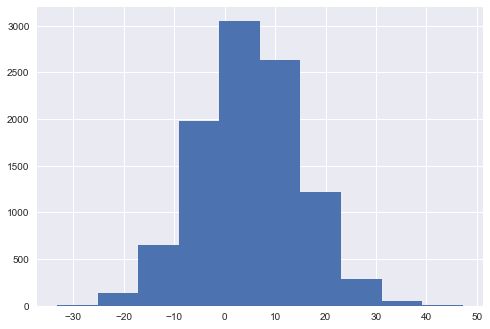

In [65]:
#常態分佈/高斯分佈 (normal distribution)
x = np.random.normal(5, 10, 10000)
plt.hist(x)

(array([114., 305., 255., 171.,  90.,  33.,  16.,   7.,   3.,   6.]),
 array([3.38235854e+12, 6.54880909e+12, 9.71525964e+12, 1.28817102e+13,
        1.60481607e+13, 1.92146113e+13, 2.23810618e+13, 2.55475124e+13,
        2.87139630e+13, 3.18804135e+13, 3.50468641e+13]),
 <BarContainer object of 10 artists>)

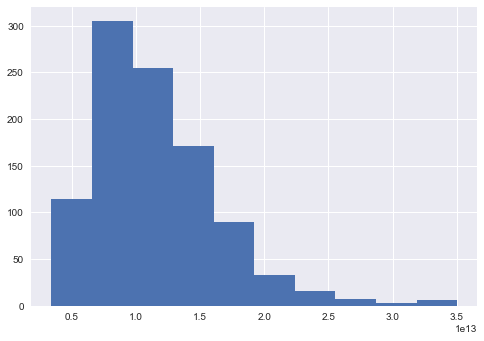

In [66]:
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)

<AxesSubplot:ylabel='Density'>

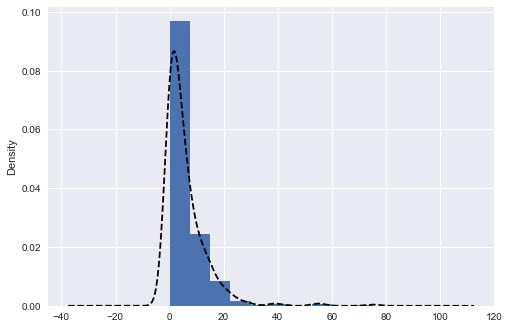

In [67]:
#核密度估計 (kernel density estimation), 核密度估計在估計邊界區域的時候會出現邊界效應。在單變量核密度估計的基礎上，可以建立風險價值的預測模型。通過對核密度估計變異係數的加權處理，可以建立不同的風險價值的預測模型。
student_data['absences'].plot(kind='kde', style='k--')
student_data['absences'].hist(density=True)

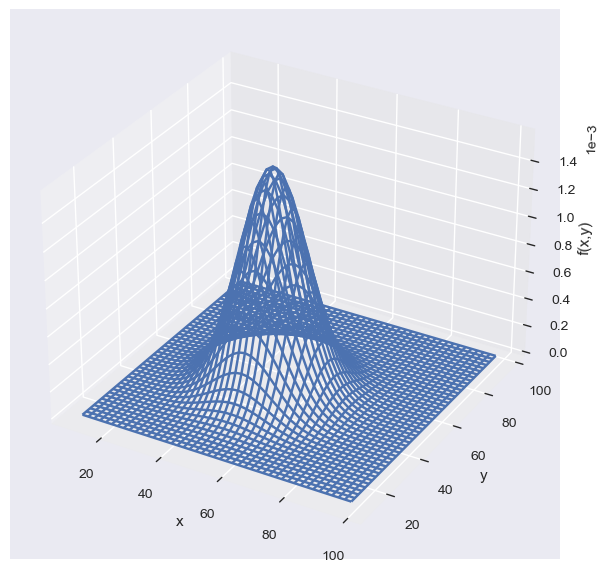

In [68]:
#多元常態分佈
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

x,y = np.mgrid[10:100:2, 10:100:2]
pos = np.empty(x.shape + (2, ))
pos[:,:,0] = x
pos[:,:,1] = y

rv = multivariate_normal([50,50],[[100,0],[0,100]])
z = rv.pdf(pos)

fig = plt.figure(dpi=100)
ax = Axes3D(fig)
ax.plot_wireframe(x,y,z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.ticklabel_format(style='sci', axis='z', scilimits=(0,0))

## 推論統計學

### 大數法則

當反覆進行試驗，其平均將逐漸接近期望值(3.5)的法則

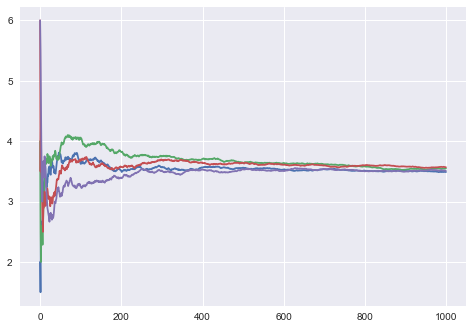

In [69]:
number_cnt = np.arange(1,1001)
for i in range(4):
    p = np.random.choice(dice_data,1000).cumsum()
    plt.plot(p / number_cnt)

### 中央極限定理

當試驗次數N越增加，樣本平均越接近常態分布

In [70]:
def function_central_theory(n):
    sample_array = np.array([1,2,3,4,5,6])
    mean_array = np.array([])
    for i in range(1000):
        cum_variables = np.random.choice(sample_array, n).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[n-1] / n)
    plt.hist(mean_array)

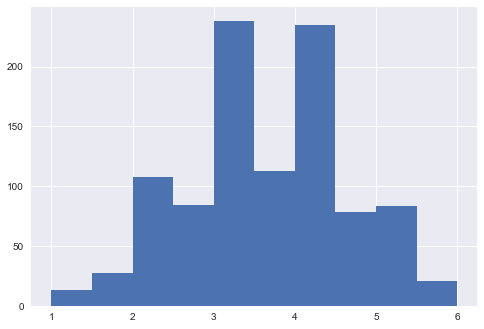

In [71]:
function_central_theory(3)

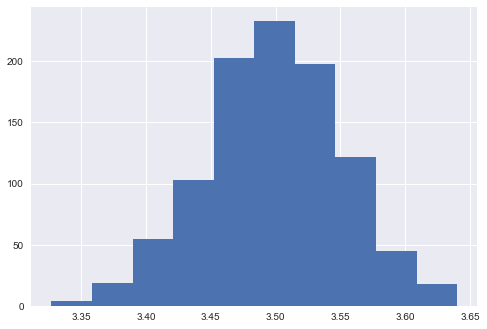

In [72]:
function_central_theory(10**3)

### 卡方分布 (chi-square distribution)

k個獨立的標準常態分布變數的平方和服從自由度為k的卡方分布。
「皮爾森卡方檢定」的虛無假說（H0）是：一個樣本中已發生事件的次數分配會遵守某個特定的理論分配。由卡方分布延伸出來皮爾森卡方檢定常用於：
* 「適合度檢定」驗證一組觀察值的次數分配是否異於理論上的分配
* 「獨立性檢定」驗證從兩個變數抽出的配對觀察值組是否互相獨立

不管哪個檢定都包含三個步驟：
* 計算卡方檢定的統計值「 $\chi$^2」：把每一個觀察值和理論值的差做平方後、除以理論值、再加總。
* 計算 $\chi$^2 統計值的自由度「df」。
* 依據研究者設定的信心水準（顯著水準、P值或對應Alpah值），查出自由度為 df 的卡方分配臨界值，比較它與第1步驟得出的 $\chi $^2 統計值，推論能否拒絕虛無假說。

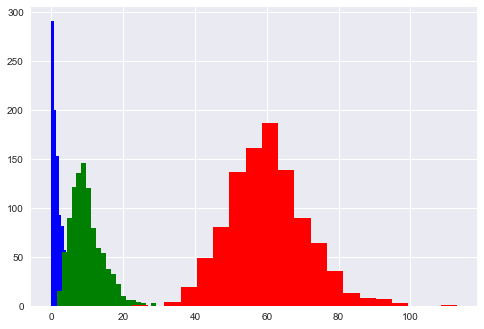

In [73]:
#遵循自由度 2, 10, 60卡方分布所生成亂數之直方圖
for df, c in zip([2,10,60],'bgr'):
    x = np.random.chisquare(df,1000)
    plt.hist(x,20,color=c)

#### t分布

(array([  1.,   0.,   5.,  30., 160., 473., 280.,  39.,  10.,   2.]),
 array([-8.40742354, -6.93001322, -5.4526029 , -3.97519259, -2.49778227,
        -1.02037195,  0.45703836,  1.93444868,  3.41185899,  4.88926931,
         6.36667963]),
 <BarContainer object of 10 artists>)

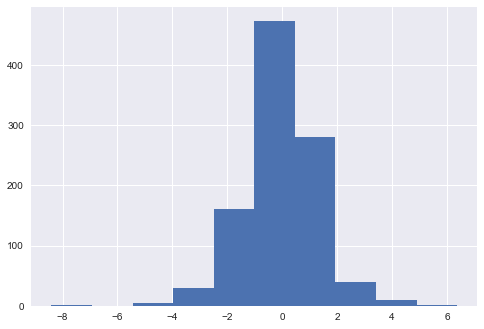

In [74]:
x = np.random.standard_t(5,1000)
plt.hist(x)

#### F分布

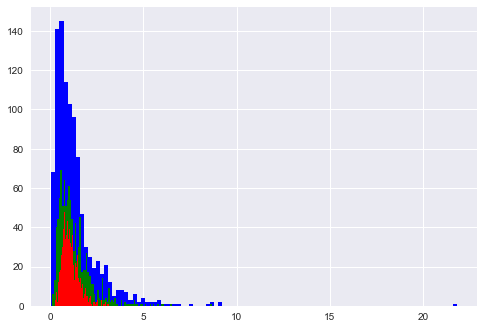

In [75]:
for df, c in zip([(6,7),(10,10),(20,25)],'bgr'):
    x = np.random.f(df[0], df[1],1000)
    plt.hist(x,100,color=c)

### Pandas 時間序列資料處理 pandas-datareader

In [76]:
import pandas_datareader.data as web

pandas_datareader可以直接到網路上跟合作的廠商抓資料，無須輸入任何API網址，只要輸入:
1.要什麼資料, 2.從哪個來源來, 3.從什麼時候的資料開始

In [77]:
#使用 2001/1/2至 2016/12/30為止的美元日幣匯率資料
fx_jpusdata = web.DataReader('DEXJPUS','fred','2001/1/2','2016/12/30')
fx_jpusdata.head()

,DEXJPUS
DATE,
2001-01-02,114.73
2001-01-03,114.26
2001-01-04,115.47
2001-01-05,116.19
2001-01-08,115.97


In [78]:
fx_jpusdata['2016-04']

,DEXJPUS
DATE,
2016-04-01,112.06
2016-04-04,111.18
2016-04-05,110.26
2016-04-06,109.63
2016-04-07,107.98
2016-04-08,108.36
2016-04-11,107.96
2016-04-12,108.54
2016-04-13,109.21


In [79]:
fx_jpusdata.resample('M').last().head()

,DEXJPUS
DATE,
2001-01-31,116.39
2001-02-28,117.28
2001-03-31,125.54
2001-04-30,123.57
2001-05-31,118.88


In [80]:
fx_jpusdata.shift(1).head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,114.73
2001-01-04,114.26
2001-01-05,115.47
2001-01-08,116.19


In [81]:
fx_jpusdata_ratio = fx_jpusdata / fx_jpusdata.shift(1)
fx_jpusdata_ratio.head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,0.995903
2001-01-04,1.010590
2001-01-05,1.006235
2001-01-08,0.998107


In [82]:
fx_jpusdata.rolling(3).mean().head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,NaN
2001-01-04,114.820000
2001-01-05,115.306667
2001-01-08,115.876667


In [83]:
fx_jpusdata.rolling(3).std().head()

,DEXJPUS
DATE,
2001-01-02,NaN
2001-01-03,NaN
2001-01-04,0.610000
2001-01-05,0.975312
2001-01-08,0.368963
